In [2]:
# Check MMRotate installation
import mmrotate
print(mmrotate.__version__)

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

0.3.4
2.28.2
10.1
GCC 7.3


In [15]:
import os, sys
sys.path.append('mmrotate/')
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import show_result_pyplot, inference_detector
from mmrotate.models import build_detector
from mmrotate.apis import inference_detector_by_patches

In [25]:

# Choose to use a config and initialize the detector
config = 'work_dirs/oriented_reppoints_basic/oriented_reppoints_basic.py'
# Setup a checkpoint file to load
checkpoint = 'work_dirs/oriented_reppoints_basic/epoch_8.pth'

# Set the device to be used for evaluation
device='cuda'
os.environ['FORCE_CUDA'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['MMCV_WITH_OPS'] = '1'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint)
print('Model Load')

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: work_dirs/oriented_reppoints_basic/epoch_8.pth
Model Load


RotatedRepPoints(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [26]:
# Use the detector to do inference
img = '../sample/train_scale1_h640_w640_oh0.0_ow0.0_min1/maxar_001_0_4480_640_5120.jpg'
result = inference_detector(model, img)

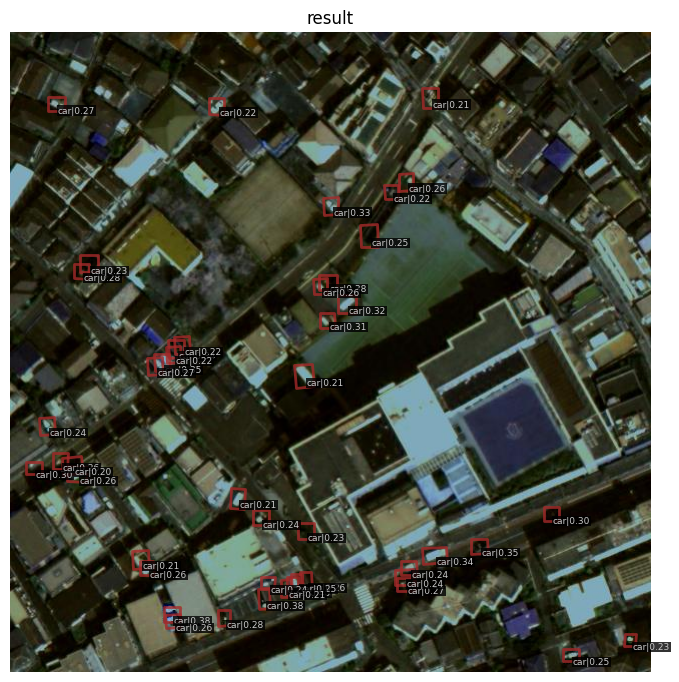

In [27]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.2, palette='dota')